## **Connect to Google Drive to access Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Covid19/BACP'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Covid19/BACP


## **Import all Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.preprocessing import LabelBinarizer
import pickle
import cv2
from glob import glob
from skimage.transform import resize

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Lambda
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator  
from keras.applications import xception, vgg19, inception_v3

## **Define Few Parameters**

In [4]:
IMAGE_SIZE = [224, 224] # feel free to change depending on dataset

#define paths
trcp = 'CovidData/TrainCovid'
trncp = 'CovidData/TrainNoncovid'
vacp = 'CovidData/ValCovid'
vancp = 'CovidData/ValNoncovid'
tecp = 'CovidData/TestCovid'
tencp = 'CovidData/TestNoncovid'

# Use glob to grab images from path .jpg or jpeg
trcf = glob(trcp + '/*')
trncf = glob(trncp + '/*')
vacf = glob(vacp + '/*')
vancf = glob(vancp + '/*')
tecf = glob(tecp + '/*')
tencf = glob(tencp + '/*')

In [5]:
len(trcf)

300

## **Fetch Images and Class Labels from Files**

In [6]:
trcl = []
trncl = []
vacl = []
vancl = []
tecl = []
tencl = []

trci = []
trnci = []
vaci = []
vanci = []
teci = []
tenci = []

for i in range(len(trcf)):
  image = cv2.imread(trcf[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  trci.append(image)
  trcl.append(1)

for j in range(len(trncf)):
  image = cv2.imread(trncf[j])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  trnci.append(image)
  trncl.append(0)

for k in range(len(vacf)):
  image = cv2.imread(vacf[k])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  vaci.append(image)
  vacl.append(1)

for l in range(len(vancf)):
  image = cv2.imread(vancf[l])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  vanci.append(image)
  vancl.append(0)

for m in range(len(tecf)):
  image = cv2.imread(tecf[m])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  teci.append(image)
  tecl.append(1)

for n in range(len(tencf)):
  image = cv2.imread(tencf[n])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  tenci.append(image)
  tencl.append(0)

In [7]:
len(tenci)

80

## **Visualize from Data set**

In [8]:
# look at a random image for fun
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 10]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

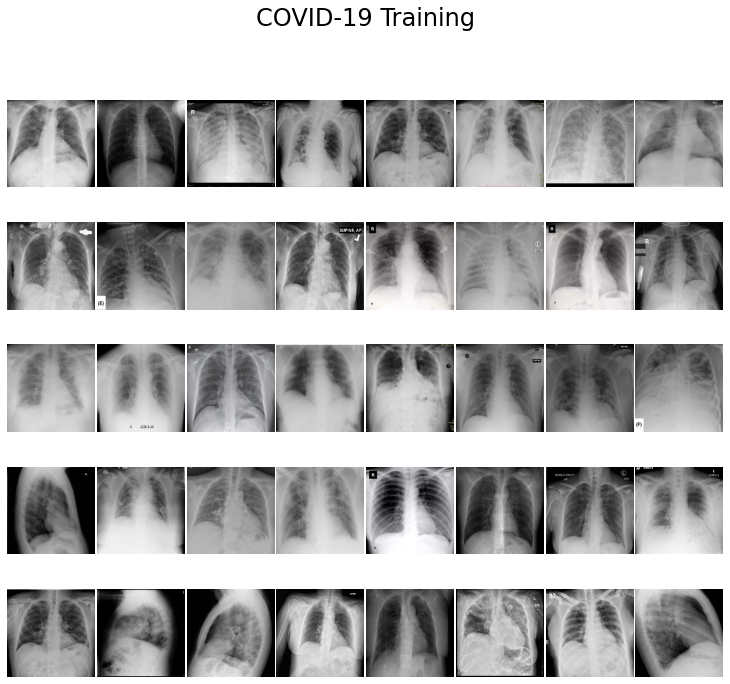

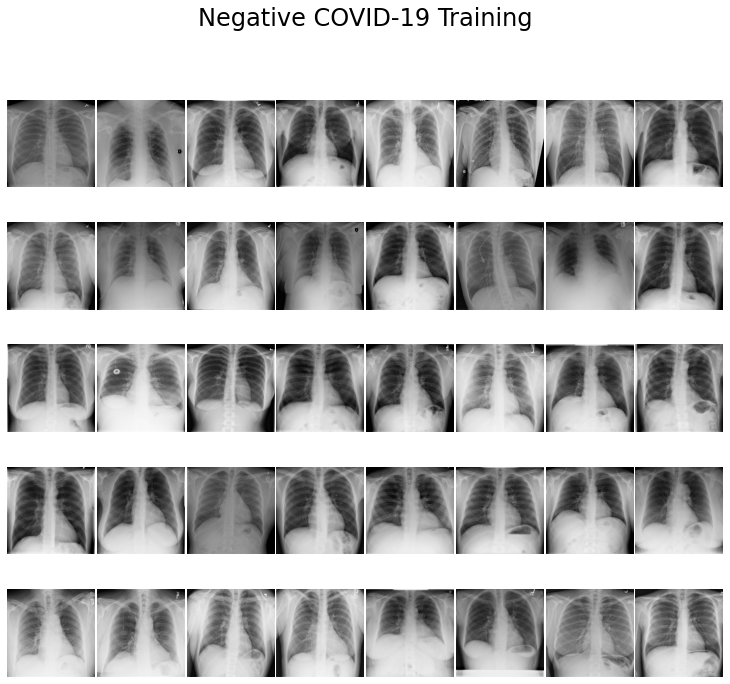

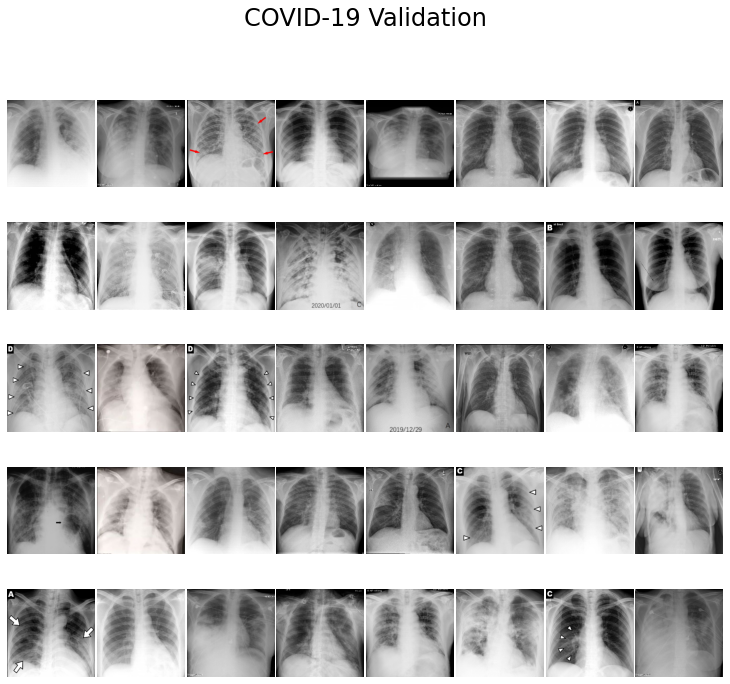

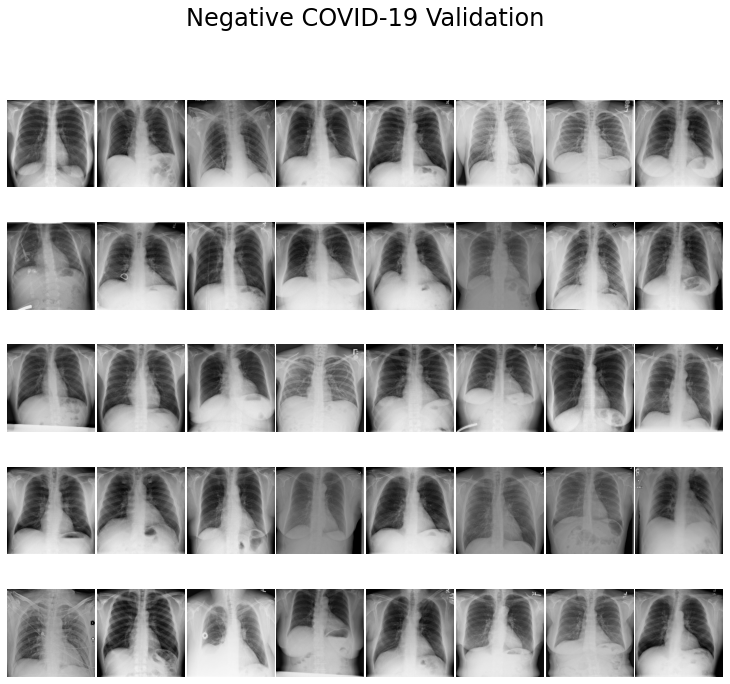

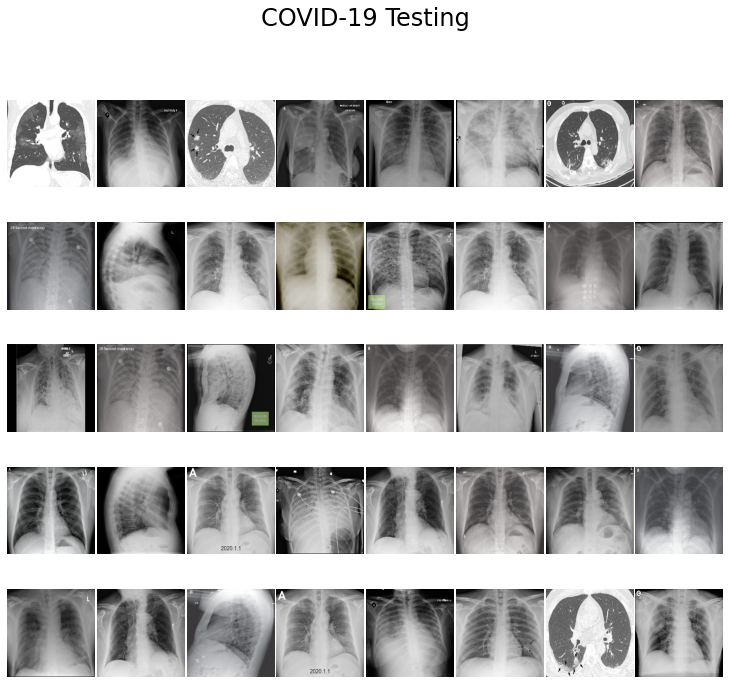

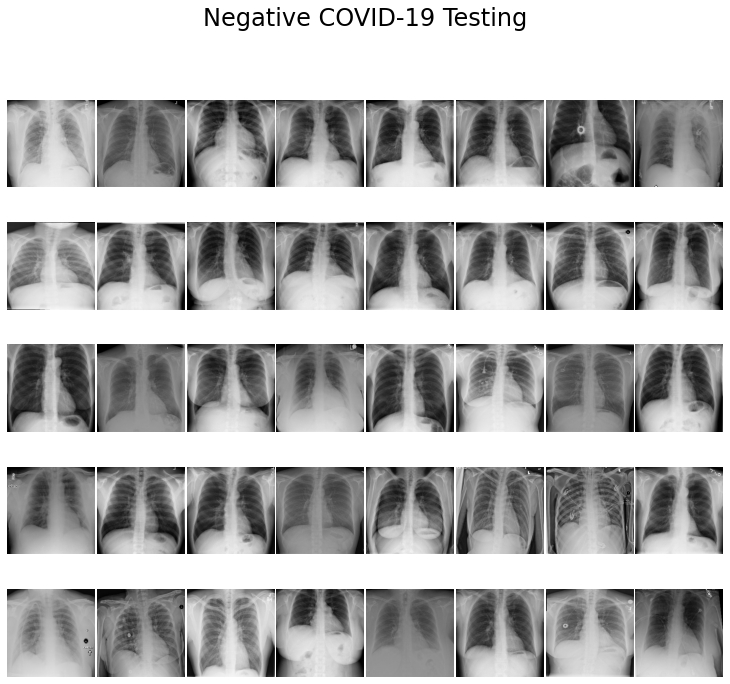

In [9]:
plot_images(trci, 'COVID-19 Training')
plot_images(trnci, 'Negative COVID-19 Training')
plot_images(vaci, 'COVID-19 Validation')
plot_images(vanci, 'Negative COVID-19 Validation')
plot_images(teci, 'COVID-19 Testing')
plot_images(tenci, 'Negative COVID-19 Testing')

In [10]:
print(trcl,'\n',trncl)
print(vacl,'\n',vancl)
print(tecl,'\n',tencl)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## **Normalizing the data to help with the training**

In [11]:
trci = np.array(trci).astype('float32') / 255
trnci = np.array(trnci).astype('float32') / 255
vaci = np.array(vaci).astype('float32') / 255
vanci = np.array(vanci).astype('float32') / 255
teci = np.array(teci).astype('float32') / 255
tenci = np.array(tenci).astype('float32') / 255

## **Train Test Split**

In [12]:
x_train = np.concatenate((trci, trnci), axis=0)
y_train = np.concatenate((trcl, trncl), axis=0)
x_val = np.concatenate((vaci, vanci), axis=0)
y_val = np.concatenate((vacl, vancl), axis=0)
x_test = np.concatenate((teci, tenci), axis=0)
y_test = np.concatenate((tecl, tencl), axis=0)

In [13]:
#Print the data type of x_train, y_train, x_val, y_val, x_test, y_test
print(type(x_train),'\t',type(y_train),'\t',type(x_val),'\t',type(y_val),'\t',type(x_test),'\t',type(y_test))

<class 'numpy.ndarray'> 	 <class 'numpy.ndarray'> 	 <class 'numpy.ndarray'> 	 <class 'numpy.ndarray'> 	 <class 'numpy.ndarray'> 	 <class 'numpy.ndarray'>


In [14]:
#Get the shape of x_train, y_train, x_val, y_val x_train, y_train
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_val shape:', x_val.shape)
print('y_val shape:', y_val.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (600, 224, 224, 3)
y_train shape: (600,)
x_val shape: (120, 224, 224, 3)
y_val shape: (120,)
x_test shape: (160, 224, 224, 3)
y_test shape: (160,)


## **Building the input vector from the 224x224 pixels**

In [15]:
x_train = x_train.reshape(x_train.shape[0], 224, 224, 3)
x_val = x_val.reshape(x_val.shape[0], 224, 224, 3)
x_test = x_test.reshape(x_test.shape[0], 224, 224, 3)

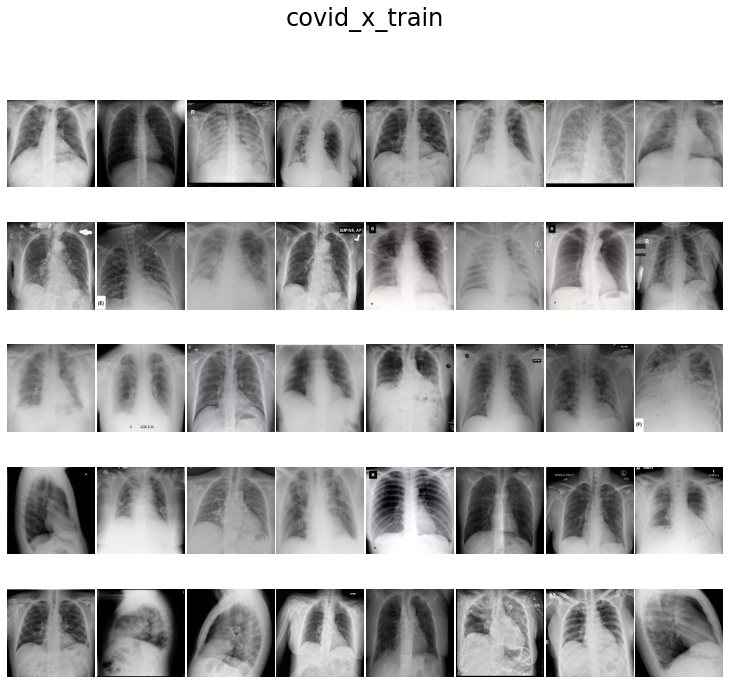

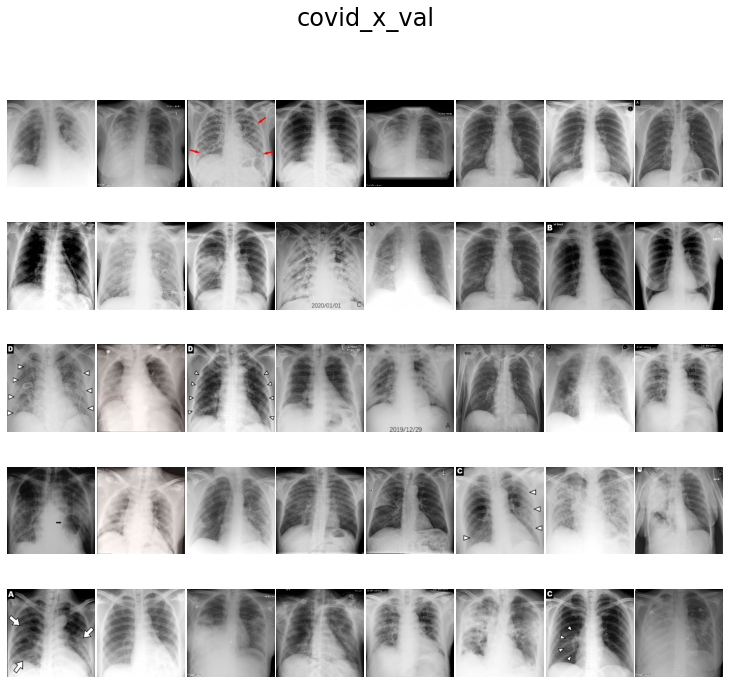

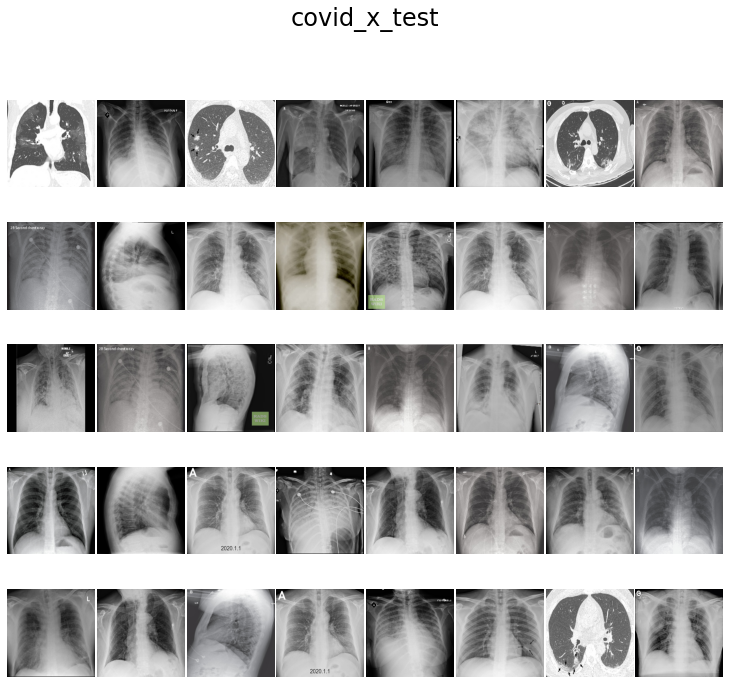

In [16]:
plot_images(x_train, 'covid_x_train')
plot_images(x_val, 'covid_x_val')
plot_images(x_test, 'covid_x_test')

## **y_train and y_test contain class lables 0 and 1**

In [17]:
# make labels into categories - either 0 or 1
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
print("Shape: ", y_train.shape,'\t',y_val.shape,'\t',y_test.shape)

Shape:  (600, 2) 	 (120, 2) 	 (160, 2)


In [18]:
print(y_train,'\n',y_val,'\n',y_test)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]] 
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [

## **Build VGG19-Model**

In [19]:
vggModel = vgg19.VGG19(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

outputs = vggModel.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model1 = Model(inputs=vggModel.input, outputs=outputs)

for layer in vggModel.layers:
    layer.trainable = False

#Image Augmentation
train_aug = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [20]:
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## **Compliling Model**

In [21]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## **Train the Model**

In [22]:
hist = model1.fit(train_aug.flow(x_train, y_train, batch_size=64), validation_data=(x_val, y_val),epochs=100)

Epoch 1/100
10/10 [==============================] - 44s 2s/step - loss: 1.7930 - accuracy: 0.4842 - val_loss: 1.5290 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 7s 681ms/step - loss: 1.1311 - accuracy: 0.5331 - val_loss: 1.0563 - val_accuracy: 0.5417
Epoch 3/100
10/10 [==============================] - 7s 678ms/step - loss: 0.7508 - accuracy: 0.6630 - val_loss: 0.9550 - val_accuracy: 0.6250
Epoch 4/100
10/10 [==============================] - 7s 677ms/step - loss: 0.6801 - accuracy: 0.6652 - val_loss: 0.7959 - val_accuracy: 0.6417
Epoch 5/100
10/10 [==============================] - 7s 672ms/step - loss: 0.6203 - accuracy: 0.7185 - val_loss: 0.5264 - val_accuracy: 0.7917
Epoch 6/100
10/10 [==============================] - 7s 672ms/step - loss: 0.5349 - accuracy: 0.7484 - val_loss: 0.3861 - val_accuracy: 0.8417
Epoch 7/100
10/10 [==============================] - 7s 670ms/step - loss: 0.5105 - accuracy: 0.7662 - val_loss: 0.3624 - val_accuracy: 0.8417
E

## **Model Evaluate**

In [23]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20011746883392334
Test accuracy: 0.8999999761581421


In [24]:
y_pred_train1 = model1.predict(x_train, batch_size=64)

y_pred_test1 = model1.predict(x_test, batch_size=64)

In [25]:
print(y_pred_train1,'\n',y_pred_test1)

[[1.21453395e-02 9.87854660e-01]
 [5.70429750e-02 9.42957044e-01]
 [4.60179854e-06 9.99995351e-01]
 ...
 [9.53814626e-01 4.61853929e-02]
 [9.35589135e-01 6.44108355e-02]
 [9.98687327e-01 1.31264387e-03]] 
 [[2.9816903e-04 9.9970180e-01]
 [3.5858288e-02 9.6414179e-01]
 [4.7853464e-04 9.9952149e-01]
 [9.9191873e-04 9.9900812e-01]
 [2.3605276e-03 9.9763954e-01]
 [1.8401603e-04 9.9981600e-01]
 [2.2182077e-07 9.9999976e-01]
 [5.4973196e-02 9.4502681e-01]
 [1.6005257e-04 9.9983990e-01]
 [6.2790903e-04 9.9937207e-01]
 [3.7062250e-02 9.6293771e-01]
 [4.2905700e-01 5.7094306e-01]
 [4.3253042e-04 9.9956745e-01]
 [3.6780145e-02 9.6321988e-01]
 [2.4245745e-01 7.5754255e-01]
 [6.9733292e-02 9.3026674e-01]
 [1.2160938e-06 9.9999881e-01]
 [4.2028041e-04 9.9957973e-01]
 [6.8467134e-06 9.9999321e-01]
 [2.8108002e-03 9.9718922e-01]
 [1.9967677e-03 9.9800318e-01]
 [2.0670967e-02 9.7932899e-01]
 [1.2921374e-03 9.9870789e-01]
 [1.7770055e-03 9.9822301e-01]
 [8.3742782e-02 9.1625720e-01]
 [5.4243218e-02 9.4

## **Convert to Binary classes**

In [26]:
y_pred_bin11 = np.argmax(y_pred_train1, axis=1)
y_train_bin11 = np.argmax(y_train, axis=1)
y_pred_bin21 = np.argmax(y_pred_test1, axis=1)
y_test_bin21 = np.argmax(y_test, axis=1)

In [27]:
print(y_pred_bin11,'\n',y_train_bin11,'\n',y_pred_bin21,'\n',y_test_bin21)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 

## **Plot ROC Curve**

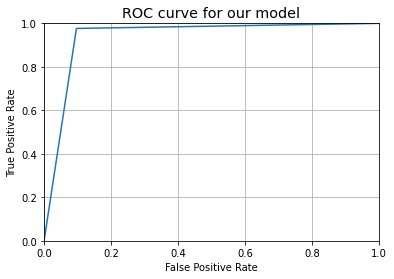

In [28]:
fpr, tpr, thresholds = roc_curve(y_train_bin11, y_pred_bin11)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

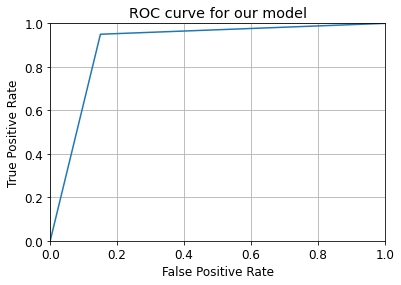

In [29]:
fpr, tpr, thresholds = roc_curve(y_test_bin21, y_pred_bin21)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## **Plot Confusion Matrix**

Confusion Matrix with Normalized Values


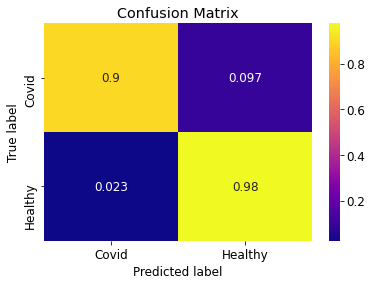

In [30]:
def plot_confusion_matrix(normalize):
  classes = ['Covid','Healthy']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_train_bin11, y_pred_bin11, normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

Confusion Matrix with Normalized Values


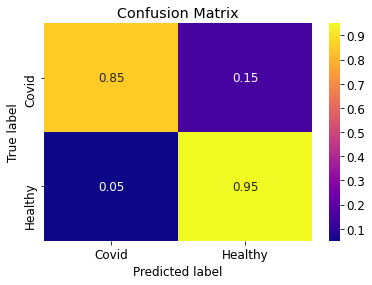

In [31]:
def plot_confusion_matrix(normalize):
  classes = ['Covid','Healthy']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin21, y_pred_bin21,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

## **Classification Report**

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_train_bin11, y_pred_bin11))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       300
           1       0.91      0.98      0.94       300

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin21, y_pred_bin21))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        80
           1       0.86      0.95      0.90        80

    accuracy                           0.90       160
   macro avg       0.90      0.90      0.90       160
weighted avg       0.90      0.90      0.90       160



## **Build Inceptionv3-Model**

In [34]:
inception = inception_v3.InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

outputs = inception.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model2 = Model(inputs=inception.input, outputs=outputs)

for layer in inception.layers:
    layer.trainable = False

#Image Augmentation
train_aug = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [35]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

## **Compiling Model**

In [36]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## **Train the Model**

In [37]:
histo = model2.fit(train_aug.flow(x_train, y_train, batch_size=64), validation_data=(x_val, y_val),epochs=100)

Epoch 1/100
10/10 [==============================] - 32s 1s/step - loss: 6.5273 - accuracy: 0.5450 - val_loss: 1.9637 - val_accuracy: 0.6750
Epoch 2/100
10/10 [==============================] - 6s 565ms/step - loss: 2.9984 - accuracy: 0.7383 - val_loss: 4.5899 - val_accuracy: 0.6083
Epoch 3/100
10/10 [==============================] - 6s 560ms/step - loss: 3.2891 - accuracy: 0.7388 - val_loss: 1.9254 - val_accuracy: 0.7917
Epoch 4/100
10/10 [==============================] - 6s 560ms/step - loss: 2.0982 - accuracy: 0.7849 - val_loss: 2.9258 - val_accuracy: 0.7167
Epoch 5/100
10/10 [==============================] - 6s 561ms/step - loss: 0.9970 - accuracy: 0.8651 - val_loss: 2.4307 - val_accuracy: 0.7167
Epoch 6/100
10/10 [==============================] - 6s 607ms/step - loss: 1.0276 - accuracy: 0.8523 - val_loss: 1.6274 - val_accuracy: 0.7583
Epoch 7/100
10/10 [==============================] - 6s 565ms/step - loss: 0.7790 - accuracy: 0.8838 - val_loss: 0.8337 - val_accuracy: 0.8083
E

## **Model Evaluate**

In [38]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.9351887702941895
Test accuracy: 0.7124999761581421


In [39]:
y_pred_train2 = model2.predict(x_train, batch_size=64)

y_pred_test2 = model2.predict(x_test, batch_size=64)

In [40]:
print(y_pred_train2,'\n',y_pred_test2)

[[1.0319387e-05 9.9998963e-01]
 [9.8521000e-01 1.4789980e-02]
 [2.1663189e-15 1.0000000e+00]
 ...
 [1.0000000e+00 1.9904822e-16]
 [1.0000000e+00 5.5154714e-16]
 [1.0000000e+00 1.1223953e-19]] 
 [[1.7466405e-21 1.0000000e+00]
 [1.0000000e+00 4.7965274e-11]
 [1.6398871e-18 1.0000000e+00]
 [9.9998677e-01 1.3288814e-05]
 [9.9999762e-01 2.3301936e-06]
 [1.2060570e-04 9.9987936e-01]
 [5.1932132e-18 1.0000000e+00]
 [9.9739730e-01 2.6026987e-03]
 [9.9980754e-01 1.9247968e-04]
 [6.7277436e-20 1.0000000e+00]
 [5.7263201e-01 4.2736802e-01]
 [9.9998868e-01 1.1278103e-05]
 [3.0108591e-09 1.0000000e+00]
 [2.1272986e-01 7.8727019e-01]
 [1.3437159e-02 9.8656285e-01]
 [9.6534401e-02 9.0346563e-01]
 [2.6477612e-27 1.0000000e+00]
 [9.8905343e-01 1.0946554e-02]
 [8.0139788e-09 1.0000000e+00]
 [5.6250137e-06 9.9999440e-01]
 [9.9663252e-01 3.3674685e-03]
 [8.9693183e-01 1.0306814e-01]
 [1.0772870e-07 9.9999988e-01]
 [9.9876934e-01 1.2305797e-03]
 [1.0000000e+00 8.4529123e-13]
 [9.3841530e-02 9.0615845e-01]


## **Convert to Binary classes**

In [41]:
y_pred_bin12 = np.argmax(y_pred_train2, axis=1)
y_train_bin12 = np.argmax(y_train, axis=1)
y_pred_bin22 = np.argmax(y_pred_test2, axis=1)
y_test_bin22 = np.argmax(y_test, axis=1)

In [42]:
print(y_pred_bin12,'\n',y_train_bin12,'\n',y_pred_bin22,'\n',y_test_bin22)

[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1
 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1
 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

## **Plot ROC Curve**

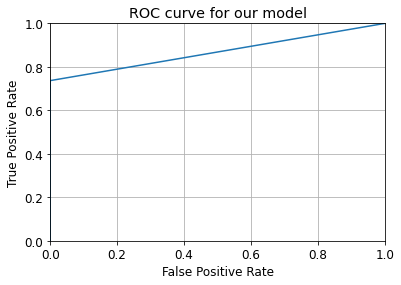

In [43]:
fpr, tpr, thresholds = roc_curve(y_train_bin12, y_pred_bin12)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

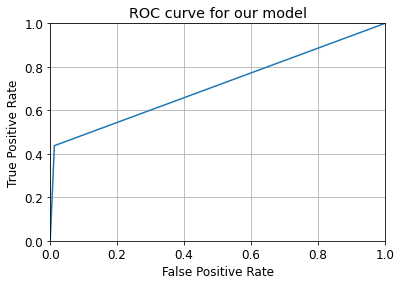

In [44]:
fpr, tpr, thresholds = roc_curve(y_test_bin22, y_pred_bin22)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## **Plot Confusion Matrix**

Confusion Matrix with Normalized Values


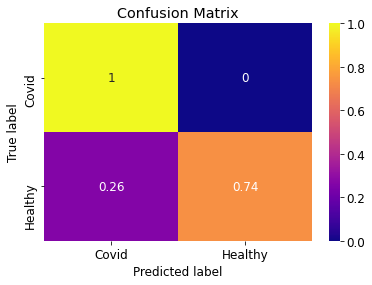

In [45]:
def plot_confusion_matrix(normalize):
  classes = ['Covid','Healthy']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_train_bin12, y_pred_bin12, normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

Confusion Matrix with Normalized Values


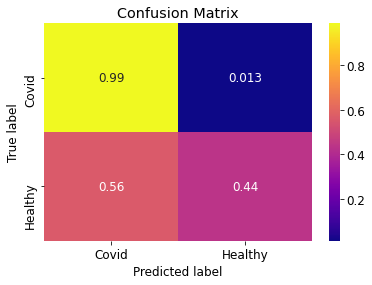

In [46]:
def plot_confusion_matrix(normalize):
  classes = ['Covid','Healthy']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin22, y_pred_bin22,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

## **Classification Report**

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_train_bin12, y_pred_bin12))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       300
           1       1.00      0.74      0.85       300

    accuracy                           0.87       600
   macro avg       0.90      0.87      0.87       600
weighted avg       0.90      0.87      0.87       600



In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin22, y_pred_bin22))

              precision    recall  f1-score   support

           0       0.64      0.99      0.77        80
           1       0.97      0.44      0.60        80

    accuracy                           0.71       160
   macro avg       0.80      0.71      0.69       160
weighted avg       0.80      0.71      0.69       160



## **Build Xception-Model**

In [49]:
xception = xception.Xception(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

outputs = xception.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model3 = Model(inputs=xception.input, outputs=outputs)

for layer in xception.layers:
    layer.trainable = False

#Image Augmentation
train_aug = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [50]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

## **Compiling Model**

In [51]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## **Train the Model**

In [52]:
hi = model3.fit(train_aug.flow(x_train, y_train, batch_size=64), validation_data=(x_val, y_val),epochs=100)

Epoch 1/100
10/10 [==============================] - 19s 1s/step - loss: 2.5687 - accuracy: 0.5809 - val_loss: 3.1688 - val_accuracy: 0.6833
Epoch 2/100
10/10 [==============================] - 7s 650ms/step - loss: 1.5350 - accuracy: 0.7948 - val_loss: 2.0534 - val_accuracy: 0.7000
Epoch 3/100
10/10 [==============================] - 7s 648ms/step - loss: 0.7509 - accuracy: 0.8580 - val_loss: 0.7627 - val_accuracy: 0.8417
Epoch 4/100
10/10 [==============================] - 7s 655ms/step - loss: 0.5938 - accuracy: 0.8673 - val_loss: 0.7092 - val_accuracy: 0.8583
Epoch 5/100
10/10 [==============================] - 7s 654ms/step - loss: 0.4886 - accuracy: 0.8864 - val_loss: 0.8147 - val_accuracy: 0.8083
Epoch 6/100
10/10 [==============================] - 7s 702ms/step - loss: 0.5021 - accuracy: 0.8810 - val_loss: 0.5332 - val_accuracy: 0.8667
Epoch 7/100
10/10 [==============================] - 6s 629ms/step - loss: 0.4764 - accuracy: 0.8636 - val_loss: 0.8044 - val_accuracy: 0.7750
E

## **Model Evaluate**

In [53]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.212843418121338
Test accuracy: 0.8374999761581421


In [54]:
y_pred_train3 = model3.predict(x_train, batch_size=64)

y_pred_test3 = model3.predict(x_test, batch_size=64)

In [55]:
print(y_pred_train3,'\n',y_pred_test3)

[[9.9497173e-12 1.0000000e+00]
 [3.1915589e-18 1.0000000e+00]
 [1.7303188e-07 9.9999988e-01]
 ...
 [9.9869007e-01 1.3098968e-03]
 [9.9998164e-01 1.8326387e-05]
 [1.0000000e+00 6.8132587e-12]] 
 [[1.1668701e-12 1.0000000e+00]
 [8.9226937e-09 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [4.7544515e-09 1.0000000e+00]
 [1.7757058e-07 9.9999988e-01]
 [1.8499985e-15 1.0000000e+00]
 [2.3736407e-24 1.0000000e+00]
 [2.0423303e-09 1.0000000e+00]
 [9.6601057e-01 3.3989403e-02]
 [1.6915366e-25 1.0000000e+00]
 [1.9158904e-08 1.0000000e+00]
 [1.0358361e-02 9.8964161e-01]
 [2.7262557e-16 1.0000000e+00]
 [1.2884833e-07 9.9999988e-01]
 [1.1691516e-02 9.8830843e-01]
 [6.3175987e-04 9.9936825e-01]
 [2.5502089e-17 1.0000000e+00]
 [9.1459042e-01 8.5409530e-02]
 [5.7032458e-30 1.0000000e+00]
 [1.2176721e-12 1.0000000e+00]
 [2.1132522e-07 9.9999976e-01]
 [2.3363975e-22 1.0000000e+00]
 [4.9948604e-12 1.0000000e+00]
 [9.9998939e-01 1.0640034e-05]
 [1.6101295e-04 9.9983895e-01]
 [1.0003724e-18 1.0000000e+00]


## **Convert to Binary classes**

In [56]:
y_pred_bin13 = np.argmax(y_pred_train3, axis=1)
y_train_bin13 = np.argmax(y_train, axis=1)
y_pred_bin23 = np.argmax(y_pred_test3, axis=1)
y_test_bin23 = np.argmax(y_test, axis=1)

In [57]:
print(y_pred_bin13,'\n',y_train_bin13,'\n',y_pred_bin23,'\n',y_test_bin23)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

## **Plot ROC Curve**

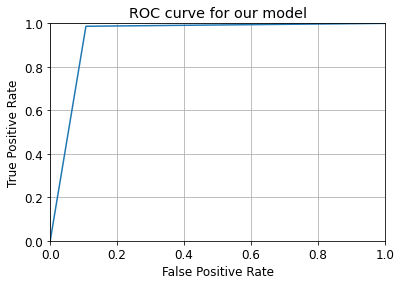

In [58]:
fpr, tpr, thresholds = roc_curve(y_train_bin13, y_pred_bin13)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

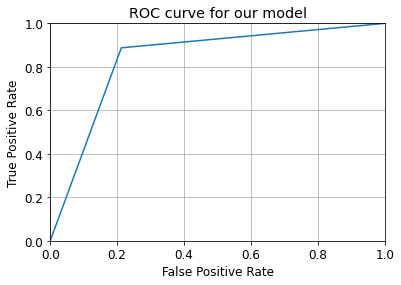

In [59]:
fpr, tpr, thresholds = roc_curve(y_test_bin23, y_pred_bin23)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## **Plot Confusion Matrix**

Confusion Matrix with Normalized Values


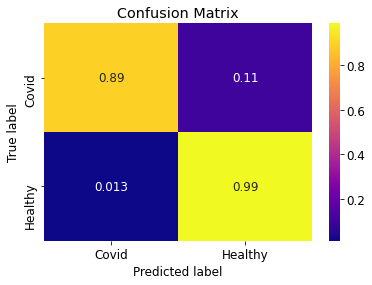

In [60]:
def plot_confusion_matrix(normalize):
  classes = ['Covid','Healthy']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_train_bin13, y_pred_bin13, normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

Confusion Matrix with Normalized Values


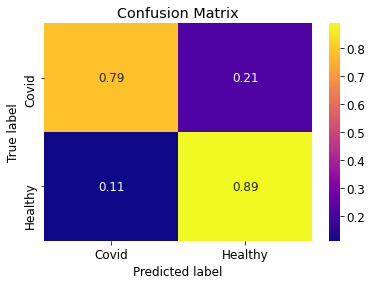

In [61]:
def plot_confusion_matrix(normalize):
  classes = ['Covid','Healthy']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin23, y_pred_bin23,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

## **Classification Report**

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_train_bin13, y_pred_bin13))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       300
           1       0.90      0.99      0.94       300

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin23, y_pred_bin23))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        80
           1       0.81      0.89      0.85        80

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160



## **Save the Model**

In [64]:
model1.save('mymodel.h5')